In [22]:
!pip install shap
!pip install joblib

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import joblib

In [231]:
# load  dataset
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
# data_train.head()
# data_test.head()
data_train.shape

(1460, 81)

In [179]:
# check the distribution
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [180]:
# Step 3: Exploratory Data Analysis (EDA)
print("Train Dataset Info:")
print(data_train.info())

# Check for missing values
print("Missing Values:")
print("train data set mssing values",data_train.isnull().sum().sort_values(ascending=False)[:19])
print("train data set mssing values",data_test.isnull().sum().sort_values(ascending=False)[:35])

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

C:\Users\barat\AppData\Local\Temp\ipykernel_13416\2775125512.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


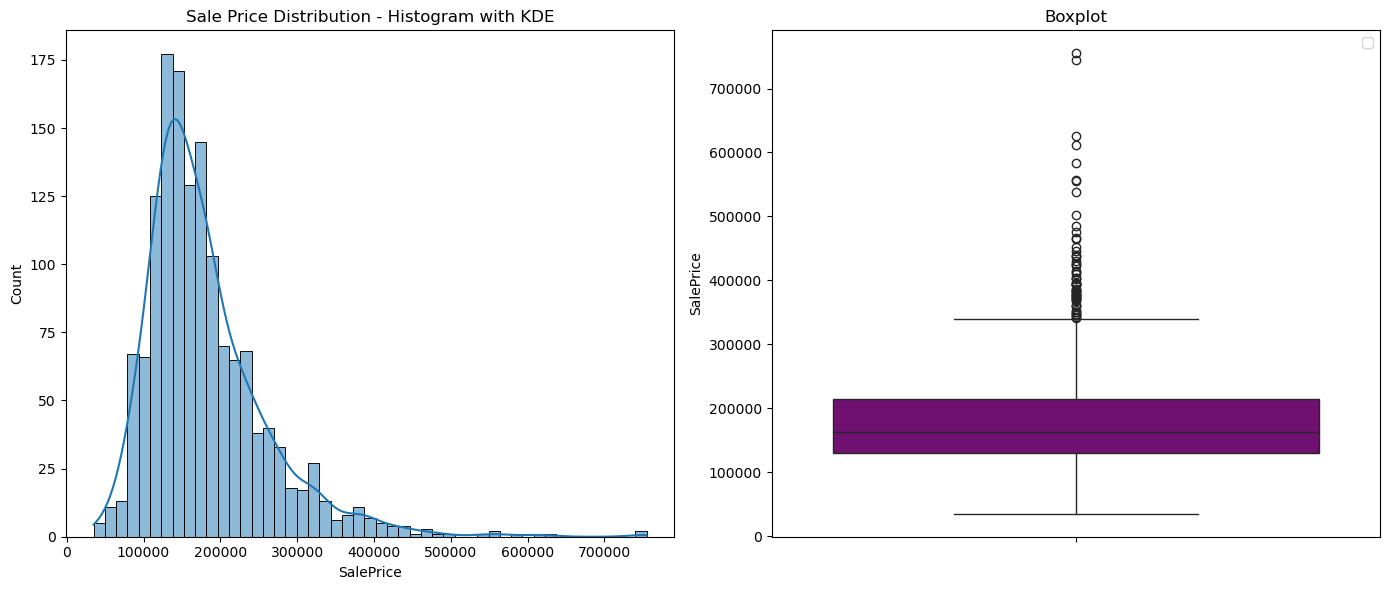

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with KDE
sns.histplot(data=data_train['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Sale Price Distribution - Histogram with KDE')

# Boxplot
sns.boxplot(data=data_train['SalePrice'], ax=axes[1],color='purple')
# Calculate median
median = data_train['SalePrice'].median()
# Annotate median
axes[1].set_title('Boxplot')
# axes[1].axvline(median, color='red', linestyle='--', label=f'Median: {median:,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Feature engineering(featurization, feature selection - PCA), Pipeline, Linear regression

In [218]:
# Feature engineering
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
df["GarageAge"] = df["YrSold"] - df["GarageYrBlt"]
df["TotalBathrooms"] = (
    df["FullBath"] + 0.5 * df["HalfBath"] +
    df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"]
)
df["TotalPorchSF"] = df[["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]].sum(axis=1)
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

# Drop columns that are redundant
df.drop(columns=["YearBuilt", "YearRemodAdd", "GarageYrBlt"], inplace=True)

# Target and features
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Define column types
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

ordinal_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual",
    "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond",
    "PoolQC", "Fence", 
]
ordinal_cols = [col for col in ordinal_cols if col in X.columns]

nominal_cols = list(set(X.columns) - set(numerical_cols) - set(ordinal_cols))

# Build a dictionary for fast access to mappings
ordinal_mapping_dict = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "FireplaceQu": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "GarageQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "PoolQC": ["Fa", "Gd", "Ex"],
    "Fence": ["MnWw", "GdWo", "MnPrv", "GdPrv"]
}

# Ensure order of mappings matches columns
ordinal_mapping_final = [ordinal_mapping_dict[col] for col in ordinal_cols]

# Now define the encoder
ordinal_enc = OrdinalEncoder(
    categories=ordinal_mapping_final,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)


# Trim mapping to match present columns
ordinal_enc = OrdinalEncoder(categories=ordinal_mapping[:len(ordinal_cols)],
                             handle_unknown='use_encoded_value',
                             unknown_value=-1)

# Pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", ordinal_enc)
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_cols),
    ("ord", ordinal_pipeline, ordinal_cols),
    ("nom", nominal_pipeline, nominal_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess first
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Then apply PCA
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test_pca)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE Linear Regression (PCA): {rmse:.2f}")
print(f"R² Score Linear Regression (PCA): {r2:.4f}")


RMSE Linear Regression (PCA): 34225.81
R² Score Linear Regression (PCA): 0.8473


# Predicting on Test data set and saving it to submission.csv

In [219]:
# Load the Kaggle test set
data_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

# ---- Feature engineering (same as training) ----
data_test["HouseAge"] = data_test["YrSold"] - data_test["YearBuilt"]
data_test["RemodAge"] = data_test["YrSold"] - data_test["YearRemodAdd"]
data_test["GarageAge"] = data_test["YrSold"] - data_test["GarageYrBlt"]
data_test["TotalBathrooms"] = (
    data_test["FullBath"] + 0.5 * data_test["HalfBath"] +
    data_test["BsmtFullBath"] + 0.5 * data_test["BsmtHalfBath"]
)
data_test["TotalPorchSF"] = data_test[["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]].sum(axis=1)
data_test["TotalSF"] = data_test["TotalBsmtSF"] + data_test["1stFlrSF"] + data_test["2ndFlrSF"]

# Drop same columns as train
data_test.drop(columns=["YearBuilt", "YearRemodAdd", "GarageYrBlt"], inplace=True)

# ---- Preprocess test data using fitted pipeline ----
X_final_test = preprocessor.transform(data_test)

# ---- Apply PCA transformation ----
X_final_test_pca = pca.transform(X_final_test)

# ---- Predict using trained linear model ----
test_preds = linear_model.predict(X_final_test_pca)

# ---- Save submission file ----
submission = pd.DataFrame({
    "Id": data_test["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as 'submission.csv'")


✅ Submission file saved as 'submission.csv'


# Simple Feature engineering, Pipeline, no pca, Linear regression

In [241]:
# Load data
data_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

# Target and features
x_train = data_train.drop("SalePrice", axis=1)
y = data_train["SalePrice"]

# Split features by type
num_features = x_train.select_dtypes(include=["int64", "float64"]).columns.to_list()
cat_features = x_train.select_dtypes(include=["object"]).columns.to_list()

# Define pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Fit preprocessor on training data and transform
x_processed_train = preprocessor.fit_transform(x_train)

# Split into train/test for validation
X_train, X_test, y_train, y_test = train_test_split(x_processed_train, y, test_size=0.2, random_state=42)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate on validation split
y_pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE Linear Regression: {rmse:.2f}")
print(f"✅ R² Score Linear Regression: {r2:.4f}")

# Preprocess the actual test set
x_test = data_test.copy()
x_processed_test = preprocessor.transform(x_test)

# Predict on the full test set (optional)
test_preds = linear_model.predict(x_processed_test)

# --------- 🔍 Function to Predict for a Single Row --------- #
def predict_price(index):
    if index < 0 or index >= len(data_test):
        print("Invalid index. Please choose a number between 0 and", len(data_test) - 1)
        return
    
    single_row = data_test.iloc[[index]]
    single_processed = preprocessor.transform(single_row)
    prediction = linear_model.predict(single_processed)[0]

    print("\n Test Sample Features:")
    print(single_row.T)
    print(f"\ Predicted SalePrice (Id={single_row['Id'].values[0]}): ${prediction:,.2f}")
    
# Example usage:
predict_price(0)  # You can replace 0 with any valid index




RMSE Linear Regression: 29536.16
✅ R² Score Linear Regression: 0.8863

 Test Sample Features:
                    0
Id               1461
MSSubClass         20
MSZoning           RH
LotFrontage      80.0
LotArea         11622
...               ...
MiscVal             0
MoSold              6
YrSold           2010
SaleType           WD
SaleCondition  Normal

[80 rows x 1 columns]
\ Predicted SalePrice (Id=1461): $118,031.51


# With Random forest

In [246]:
X_train, X_test, y_train, y_test = train_test_split(x_processed_train, y, test_size=0.2, random_state=42)
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf,y_test))
r2_score_rf = r2_score(y_pred_rf,y_test)

print(f"RMSE for random forest{rmse_rf:.2f}")
print(f"R2 Score for random forest{r2_score_rf:.4f}")

RMSE for random forest29245.72
R2 Score for random forest0.8434


# with RF tuned

In [247]:
rf_model_tuned = RandomForestRegressor(bootstrap=False,
                                       max_depth=20,
                                       max_features='sqrt',
                                       min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=1
                                      )
rf_model_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_model_tuned.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf_tuned,y_test))
r2_score_rf = r2_score(y_pred_rf_tuned,y_test)

print(f"RMSE for random forest tuned: {rmse_rf:.2f}")
print(f"R2 Score for random forest tuned: {r2_score_rf:.4f}")

RMSE for random forest tuned: 53022.04
R2 Score for random forest tuned: 0.4985
